In [159]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import json
import re

In [174]:
class DescriptionSyntaxError(Exception):
    def __init__(self, value, line_num):
        self.value = value
        self.line_num = line_num

    def __str__(self):
        return 'SyntaxError: {0} at line {1} is an invalid CASP RR input. Please refer to http://predictioncenter.org/casp13/index.cgi?page=format '.format(self.value, self.line_num)
    
class RRColumnSyntaxError(Exception):
    def __init__(self, line_num):
        self.line_num = line_num

    def __str__(self):
        return 'SyntaxError: line {0} has an invalid CASP RR column length. Expected the list of contacts in the five-column format. Please refer to http://predictioncenter.org/casp13/index.cgi?page=format '.format(self.line_num)

{
  "PFRMAT": "RR",
  "TARGET": "T0958",
  "AUTHOR": "DM-ORIGAMI-TEAM",
  "SCORE": "N/A",
  "REMARK": "N/A",
  "METHOD": "dm-contacts-resnet",
  "MODEL": "1",
  "SEQ": "MNKKSKQQEKLYNFIIAKSFQQPVGSTFTYGELRKKYNVVCSTNDQREVGRRFAYWIKYTPGLPFKIVGTKNGSLLYQKIGINPCNNSTPSKGGDC",
  "SEQ LENGTH": 96
}


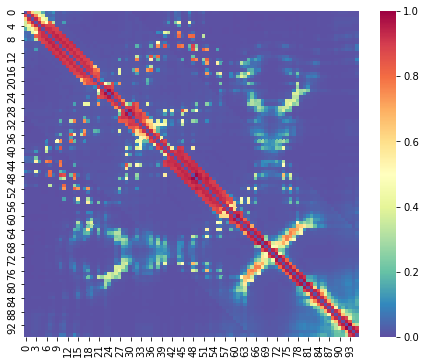

In [179]:
# This is only for PFRMAT RR
f = open("examples/T0958.rr", "r")
curr_line = 0

# http://predictioncenter.org/casp13/index.cgi?page=format
records = {
    'PFRMAT': 'N/A',
    'TARGET': 'N/A',
    'AUTHOR': 'N/A',
    'SCORE' : 'N/A',
    'REMARK': 'N/A',
    'METHOD': 'N/A',
    'MODEL' : 'N/A',
    'SEQ'   : 'N/A',
    'SEQ LENGTH': 'N/A'
}

line = f.readline().strip()
curr_line += 1

while line:
    line_split = line.split(maxsplit=1)
    first_word = line_split[0]
    
    if first_word not in records:
        raise DescriptionSyntaxError(first_word, curr_line)
    
    # Need to check length since 
    # sometimes there is nothing after the record
    # e.g, MODEL (followed by nothing)
    if len(line_split) > 1:
        records[first_word] = line_split[1]
    
    if (first_word == 'MODEL'):
        break;
        
    line = f.readline().strip()
    curr_line += 1

#TODO Check for valid sequence of amino acids
seq = f.readline().strip()
curr_line += 1
seq_len = len(seq)
records['SEQ'] = seq
records['SEQ LENGTH'] = seq_len

# Init matrix 
matrix = np.zeros((seq_length, seq_length))

while True:
    line = f.readline().strip()
    curr_line += 1
    
    if line and (line != "END"):
        line = line.split()
        
        if len(line) != 5:
            raise RRColumnSyntaxError(curr_line)
        
        i = int(line[0]) - 1
        j = int(line[1]) - 1
        p = float(line[4])
        
        # Populate a symmetric matrix
        matrix[i][j] = p
        matrix[j][i] = p
    else:
        break
        
f.close()

fig, ax = plt.subplots(figsize=(7.5,6)) 
sns.heatmap(matrix, vmin=0, vmax=1, cmap='Spectral_r')

print(json.dumps(records, indent=2))